In [1]:
import matplotlib.pyplot as plt
import torch.nn as nn

In [2]:
def schedule_threshold(
    step: int,
    total_step: int,
    warmup_steps: int,
    initial_threshold: float,
    final_threshold: float,
    initial_warmup: int,
    final_warmup: int,
    final_lambda: float,
):
    if step <= initial_warmup * warmup_steps:
        threshold = initial_threshold
    elif step > (total_step - final_warmup * warmup_steps):
        threshold = final_threshold
    else:
        spars_warmup_steps = initial_warmup * warmup_steps
        spars_schedu_steps = (final_warmup + initial_warmup) * warmup_steps
        mul_coeff = 1 - (step - spars_warmup_steps) / (total_step - spars_schedu_steps)
        threshold = final_threshold + (initial_threshold - final_threshold) * (mul_coeff ** 3)
    regu_lambda = final_lambda * threshold / final_threshold
    return threshold, regu_lambda

In [5]:
thresholds = []
for i in range(1, 1495):
    threshold, regu_lambda = schedule_threshold(i, 1495, 200, 1.0, 0.15, 1, 2, 1)
    thresholds.append(threshold)

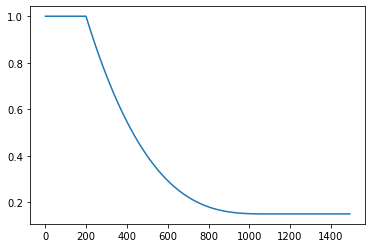

In [6]:
plt.plot(range(0, 1494), thresholds)